# Objetivo do projeto


Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.

Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.

##  Imports e informações gerais

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.shape

(16715, 11)

Em primeira analise no df, vemos que o df contém valores ausentes e colunas com formatos inadequados.

## Limpeza e pré-processamento dos dados

In [6]:
# Limpeza e pré-processamento dos dados

df.duplicated().sum()

0

In [7]:
# Vefificando a presença de valores nulos
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Observamos que o df possui uma grande parte de suas linhas contendo valores ausentes. Irei decidir o que fazer com eles mais adiante.

### Arrumando a coluna 'Year_of_Release'

In [8]:
# Verificando as linhas com valores nulos na coluna 'Year_of_Release'
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Irei substituir os valores nulos da coluna 'Year_of_Release' por valores presentes com base no nome e a plataforma que o jogo foi lançado.

In [9]:
# Ordenar o DataFrame por nome do jogo, plataforma e ano de lançamento
df.sort_values(['Name', 'Platform', 'Year_of_Release'], inplace=True)

# Preencher os valores nulos de Year_of_Release com o valor da próxima linha válida para o mesmo jogo e plataforma
df['Year_of_Release'].fillna(method='ffill', inplace=True)

# Verificar se ainda existem jogos com ano de lançamento nulo após o preenchimento
jogos_sem_ano = df[df['Year_of_Release'].isnull()]['Name'].unique()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_17300\1017529488.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Year_of_Release'].fillna(method='ffill', inplace=True)


In [10]:
# Verificando se todos os valores foram preenchidos
df.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [11]:
# Verificar se ainda existem jogos com ano de lançamento nulo após o preenchimento
jogos_com_valores_preenchidos = df[df['Name'].duplicated(keep=False)]
jogos_com_valores_preenchidos = jogos_com_valores_preenchidos[jogos_com_valores_preenchidos['Year_of_Release'].notnull()]
jogos_com_valores_preenchidos = jogos_com_valores_preenchidos.groupby(['Name', 'Platform'])['Year_of_Release'].unique()

# Verificando se os valores preenchidos foram preechidos de forma adequada
for (jogo, plataforma), anos in jogos_com_valores_preenchidos.items():
    if len(anos) > 1:
        print("Valores preenchidos inconsistentes para o jogo", jogo, "na plataforma", plataforma)
        print("Anos:", anos)

Valores preenchidos inconsistentes para o jogo Need for Speed: Most Wanted na plataforma PC
Anos: [2005. 2012.]
Valores preenchidos inconsistentes para o jogo Need for Speed: Most Wanted na plataforma X360
Anos: [2005. 2012.]


In [12]:
# Vizualizando o jogo com valores preenchidos inconscistentes
df[df['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,Need for Speed: Most Wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [13]:
# Alterar os valores do jogo 'Need for Speed: Most Wanted' para a plataforma x360
df.loc[(df['Name'] == 'Need for Speed: Most Wanted') & (df['Platform'] == 'X360'), 'Year_of_Release'] = 2005

# Alterar os valores do jogo 'Need for Speed: Most Wanted' para a plataforma PC
df.loc[(df['Name'] == 'Need for Speed: Most Wanted') & (df['Platform'] == 'PC'), 'Year_of_Release'] = 2012

In [14]:
# Verificando quais os valores existem na coluna pro jogo 'Need for Speed: Most Wanted'
df[df['Name'] == 'Need for Speed: Most Wanted']['Year_of_Release'].value_counts()

Year_of_Release
2005.0    7
2012.0    4
2013.0    1
Name: count, dtype: int64

In [15]:
# Agrupar o DataFrame por nome do jogo e plataforma, verificando a quantidade de valores únicos de ano de lançamento
jogos_com_valores_duplicados = df.groupby(['Name', 'Platform'])['Year_of_Release'].nunique().reset_index()

# Filtrar os jogos que possuem mais de um valor de ano de lançamento
jogos_com_valores_duplicados = jogos_com_valores_duplicados[jogos_com_valores_duplicados['Year_of_Release'] > 1]

# Imprimir os jogos com valores duplicados de ano de lançamento
if not jogos_com_valores_duplicados.empty:
    print("Jogos com valores duplicados de ano de lançamento:")
    print(jogos_com_valores_duplicados)
else:
    print("Não foram encontrados jogos com valores duplicados de ano de lançamento.")

Não foram encontrados jogos com valores duplicados de ano de lançamento.


In [16]:
# Alterando o tipo da coluna
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

In [17]:
# Verificando se funcionou
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16715 entries, 14983 to 14244
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16715 non-null  int32  
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Nessa coluna eu substitui os valores ausentes por valores presentes nos mesmos jogos de mesma plataforma para que não haja a necessidade de remoção dessas linhas.

### Name

In [18]:
# Verificando as linhas com valores nulos em 'Name'
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [19]:
# Removendo as linhas com valores nulos em 'Name'
df.dropna(subset=['Name'], inplace=True)

In [20]:
# Verificando se os valores foram removidos
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8576
User_Score         6699
Rating             6764
dtype: int64

Nessa coluna, apenas duas linhas foram removidas devido à ausência de valores, pois eram insignificantes para o dataframe.

### Critic_Score

In [21]:
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14983,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14453,thinkSMART FAMILY!,Wii,2010,Misc,0.03,0.00,0.00,0.00,NaN,tbd,E
16494,thinkSMART: Chess for Kids,DS,2011,Misc,0.01,0.00,0.00,0.00,NaN,tbd,E
8280,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
475,wwe Smackdown vs. Raw 2006,PS2,2011,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


In [22]:
# Criar um novo DataFrame contendo os jogos com valor ausente em 'Critic_Score'
jogos_valor_ausente = df[df['Critic_Score'].isnull()]

# Filtrar os jogos com mesmo nome que possuem valor correto em 'Critic_Score'
jogos_com_valor_correto = df[(~df['Critic_Score'].isnull()) & df['Name'].isin(jogos_valor_ausente['Name'])]

# Imprimir os jogos com valor ausente e valor correto em 'Critic_Score'
if not jogos_com_valor_correto.empty:
    print("Jogos com mesmo nome que possuem valor ausente e valor correto em 'Critic_Score':")
    print(jogos_com_valor_correto[['Name', 'Critic_Score']])
else:
    print("Não foram encontrados jogos com mesmo nome que possuem valor ausente e valor correto em 'Critic_Score'.")

Jogos com mesmo nome que possuem valor ausente e valor correto em 'Critic_Score':
                               Name  Critic_Score
9507         007: Quantum of Solace          65.0
14658        007: Quantum of Solace          70.0
1785         007: Quantum of Solace          65.0
3120         007: Quantum of Solace          54.0
1285         007: Quantum of Solace          65.0
...                             ...           ...
649       pro evolution soccer 2011          77.0
2583      pro evolution soccer 2011          74.0
7149      pro evolution soccer 2011          78.0
3304      pro evolution soccer 2011          79.0
15612  uDraw Studio: Instant Artist          54.0

[1312 rows x 2 columns]


In [23]:
jogos_com_valor_correto

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9507,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
14658,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
1785,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
1285,007: Quantum of Solace,X360,2008,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
...,...,...,...,...,...,...,...,...,...,...,...
649,pro evolution soccer 2011,PS3,2010,Sports,0.29,1.17,0.54,0.41,77.0,6.8,E
2583,pro evolution soccer 2011,PSP,2010,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
7149,pro evolution soccer 2011,Wii,2010,Sports,0.07,0.10,0.03,0.02,78.0,5.4,E
3304,pro evolution soccer 2011,X360,2010,Sports,0.09,0.44,0.00,0.07,79.0,5.9,E


In [24]:
jogos_com_valor_correto['Name'].value_counts()

Name
Need for Speed: Most Wanted           8
Ratatouille                           7
Terraria                              7
LEGO Harry Potter: Years 5-7          7
Need For Speed: Undercover            6
                                     ..
Jeremy McGrath Supercross 2000        1
J Stars Victory Vs.                   1
Iron Chef America: Supreme Cuisine    1
Impossible Mission                    1
uDraw Studio: Instant Artist          1
Name: count, Length: 648, dtype: int64

In [25]:
# Criar um DataFrame com os jogos que possuem valor ausente em 'Critic_Score'
jogos_valor_ausente = df[df['Critic_Score'].isnull()]

# Para cada jogo com valor ausente, buscar o valor correto na mesma plataforma
for index, jogo in jogos_valor_ausente.iterrows():
    nome_jogo = jogo['Name']
    plataforma = jogo['Platform']
    
    # Buscar o valor correto na mesma plataforma
    valor_correto = df[(df['Name'] == nome_jogo) & (df['Platform'] == plataforma)]['Critic_Score'].values
    
    # Substituir o valor ausente pelo valor correto
    df.loc[index, 'Critic_Score'] = valor_correto

# Verificar se os valores ausentes foram substituídos corretamente
valores_ausentes = df[df['Critic_Score'].isnull()]
if valores_ausentes.empty:
    print("Todos os valores ausentes foram substituídos corretamente.")
else:
    print("Ainda existem valores ausentes que não foram substituídos.")


Ainda existem valores ausentes que não foram substituídos.


In [26]:
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14983,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14453,thinkSMART FAMILY!,Wii,2010,Misc,0.03,0.00,0.00,0.00,NaN,tbd,E
16494,thinkSMART: Chess for Kids,DS,2011,Misc,0.01,0.00,0.00,0.00,NaN,tbd,E
8280,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
475,wwe Smackdown vs. Raw 2006,PS2,2011,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


Aqui tentei preencher alguns valores nulos com base em valores presentes em jogos iguais, mas sem sucesso. 

Decidi não remover as linhas com esses valores nulos por se tratar de uma boa parte do df e não achar que irão afetar meus proximos passos

### User_Score

In [27]:
# Vizualizando alguns valores na coluna
df['User_Score'].value_counts()

User_Score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.2       2
0.7       2
9.7       1
0         1
Name: count, Length: 96, dtype: int64

In [28]:
# Vizualizando o tipo da coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 14983 to 9134
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16713 non-null  int32  
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 2.0+ MB


In [29]:
# Substituindo os valores 'tbd' por valores nulos
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)

In [30]:
# Convertendo o tipo da coluna pra float
df['User_Score'] = df['User_Score'].astype(float)

In [31]:
# Verificando se funcionou
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 14983 to 9134
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16713 non-null  int32  
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   float64
 10  Rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 2.0+ MB


Essa coluna contava com a presença de uma string 'tbd' para identificar jogos nos quais a crítica ainda não foi lançada. Para resolver esse problema de tipo inadequado na coluna, decidi substituir todos os valores 'tbd' por valores nulos.

### Nova coluna com as vendas totais

In [32]:
# Criando uma nova coluna com o total de vendas 
df['Total_sales'] = df[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis=1)

In [33]:
# Verificando se funcionou
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
14983,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
1079,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN,1.67
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN,0.59
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN,0.51
13794,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,NaN,E,2.42
8280,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,NaN,NaN,E,0.17
15612,uDraw Studio: Instant Artist,X360,2011,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E,0.02
475,wwe Smackdown vs. Raw 2006,PS2,2011,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00


Aqui foi criado uma nova coluna chamada 'Total_sales' com a soma dos valores de suas vendas em cada região.

## Analisando o DF

In [34]:
# Vizualizando os jogos mais vendidos por ordem decrescente
top_selling_games = df.sort_values('Total_sales', ascending=False)
top_selling_games.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [35]:
# Organizando as plataformas com mais vendas por ordem decrescente
platform_sales = df.groupby('Platform')['Total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10)

Platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: Total_sales, dtype: float64

In [36]:
# Vizualizando os generos que mais venderam por ordem decrescente
genre_sales = df.groupby('Genre')['Total_sales'].sum().sort_values(ascending=False)
genre_sales

Genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: Total_sales, dtype: float64

Essa analise é importante para vizualizar quais são as 10 plataformas que mais venderam no total, e os 10 generos que mais vendeu no total.

### Graficos 

In [37]:
# Vizualizando algumas informações extras sobre as vendas por periodo de tempo

start_year = df['Year_of_Release'].min()
end_year = df['Year_of_Release'].max()

for year in range(start_year, end_year + 1, 5):
    subset = df[(df['Year_of_Release'] >= year) & (df['Year_of_Release'] < year + 5)]
    
    # Jogos que mais venderam
    top_games = subset.nlargest(5, 'Total_sales')
    print(f"No período de {year} a {year + 4}, os 5 jogos que mais venderam foram:")
    print(top_games[['Name', 'Total_sales']])
    print()
    
    # Plataformas que mais venderam
    top_platforms = subset.groupby('Platform')['Total_sales'].sum().nlargest(5)
    print(f"No período de {year} a {year + 4}, as 5 plataformas que mais venderam foram:")
    print(top_platforms)
    print()
    
    # Gêneros que mais venderam
    top_genres = subset.groupby('Genre')['Total_sales'].sum().nlargest(5)
    print(f"No período de {year} a {year + 4}, os 5 gêneros que mais venderam foram:")
    print(top_genres)
    print()

No período de 1980 a 1984, os 5 jogos que mais venderam foram:
           Name  Total_sales
9     Duck Hunt        28.31
89      Pac-Man         7.81
240    Pitfall!         4.50
262   Asteroids         4.31
281  Excitebike         4.16

No período de 1980 a 1984, as 5 plataformas que mais venderam foram:
Platform
2600    82.05
NES     61.04
PS       0.09
PS2      0.09
Name: Total_sales, dtype: float64

No período de 1980 a 1984, os 5 gêneros que mais venderam foram:
Genre
Shooter     52.49
Action      26.52
Platform    19.57
Puzzle      16.21
Sports      11.71
Name: Total_sales, dtype: float64

No período de 1985 a 1989, os 5 jogos que mais venderam foram:
                   Name  Total_sales
1     Super Mario Bros.        40.24
5                Tetris        30.26
21     Super Mario Land        18.14
22  Super Mario Bros. 3        17.28
98  Super Mario Bros. 2         7.46

No período de 1985 a 1989, as 5 plataformas que mais venderam foram:
Platform
NES     162.47
GB       66.40
260

In [38]:
# Criando um df com as 10 plataformas que mais venderam 
platform_sales = df.groupby('Platform')['Total_sales'].sum()
top_platforms = platform_sales.nlargest(10).index
filtered_df = df[df['Platform'].isin(top_platforms)]

filtered_df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN,0.51
2454,Tales of Xillia 2,PS3,2012,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T,0.84
4728,'98 Koshien,PS,1998,Sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN,0.40
8342,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN,0.17
7087,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,NaN,E,2.42
8280,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,NaN,NaN,E,0.17
15612,uDraw Studio: Instant Artist,X360,2011,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E,0.02
475,wwe Smackdown vs. Raw 2006,PS2,2011,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00


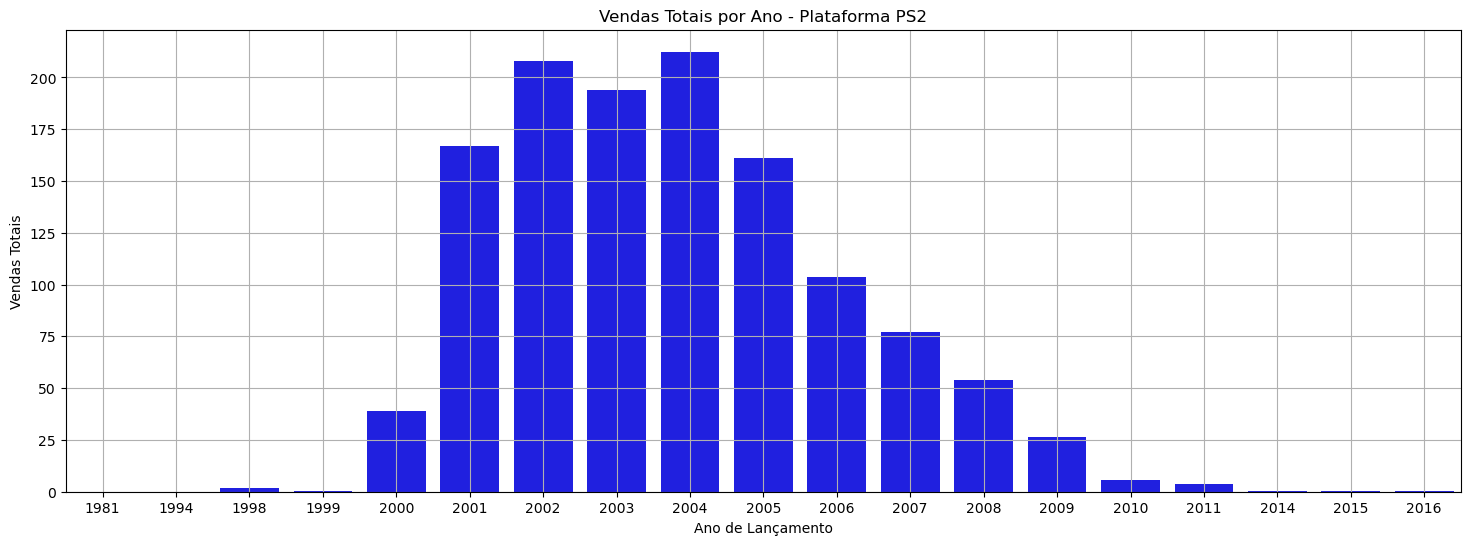

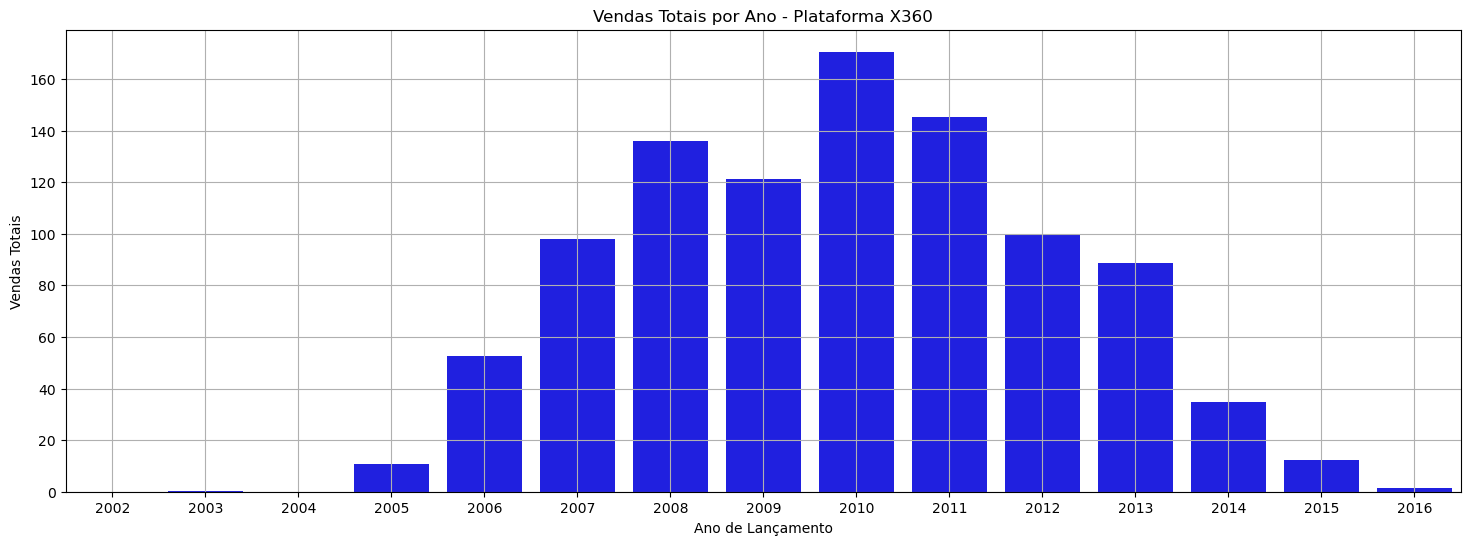

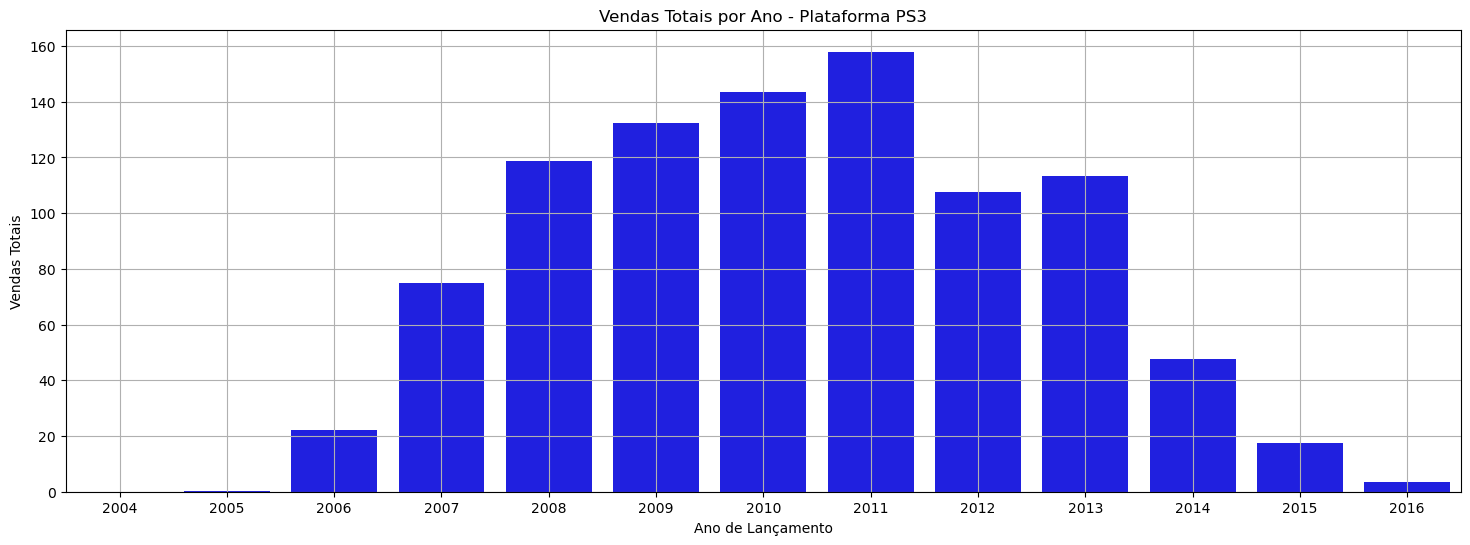

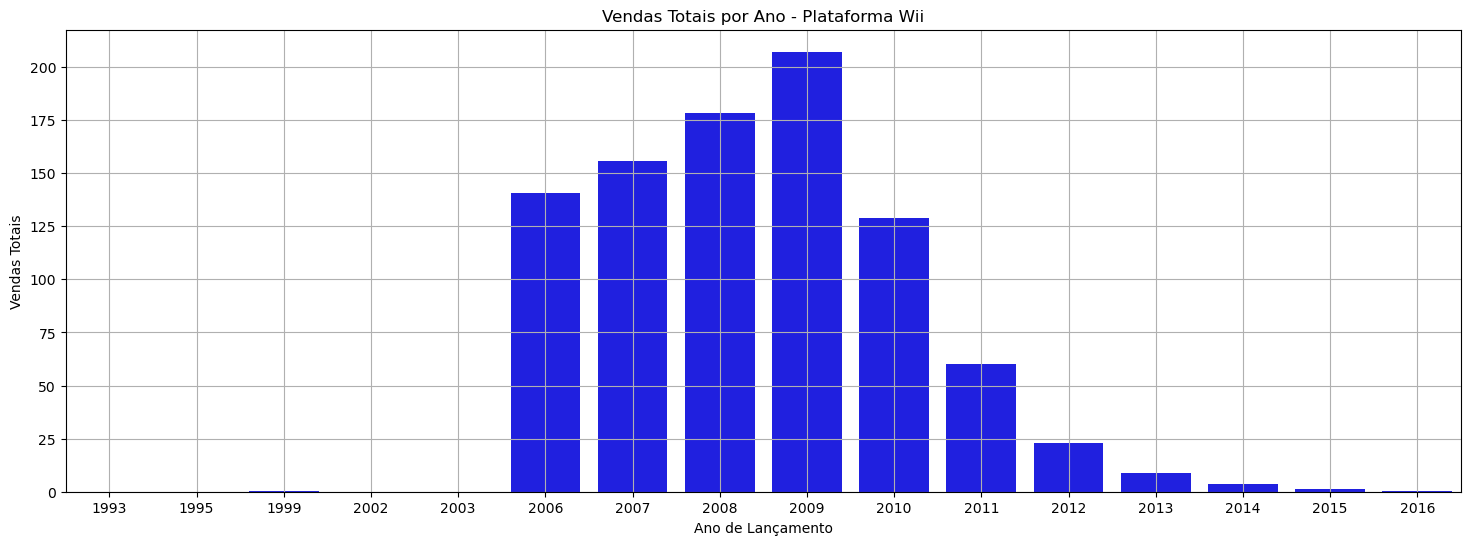

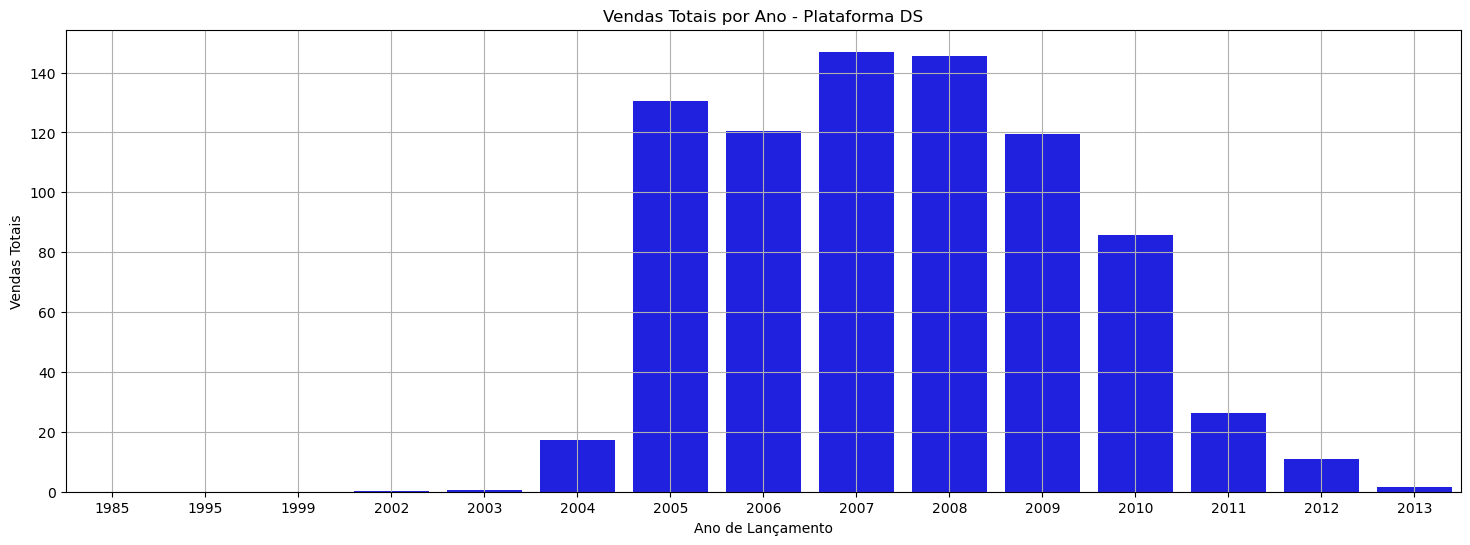

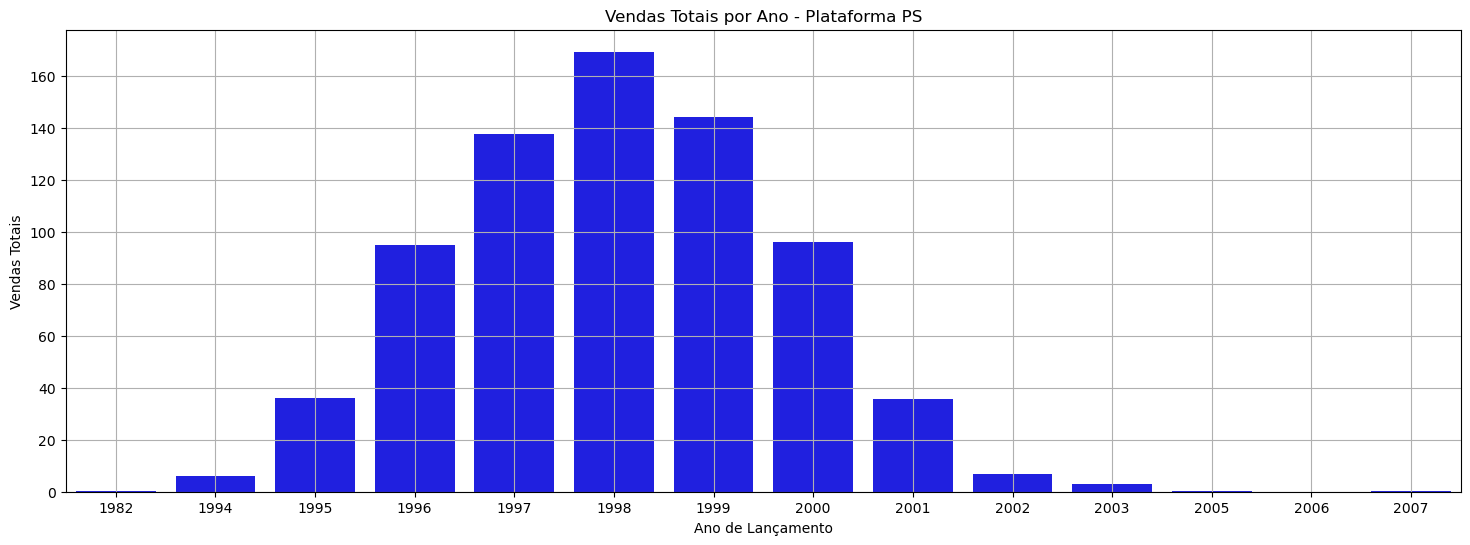

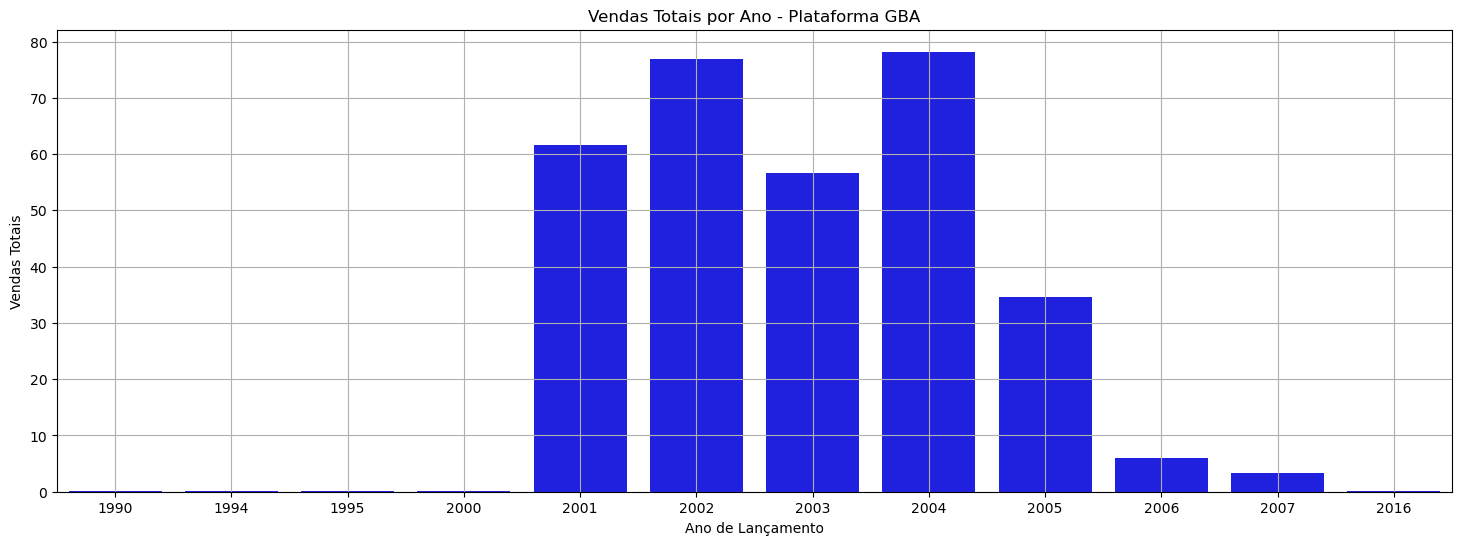

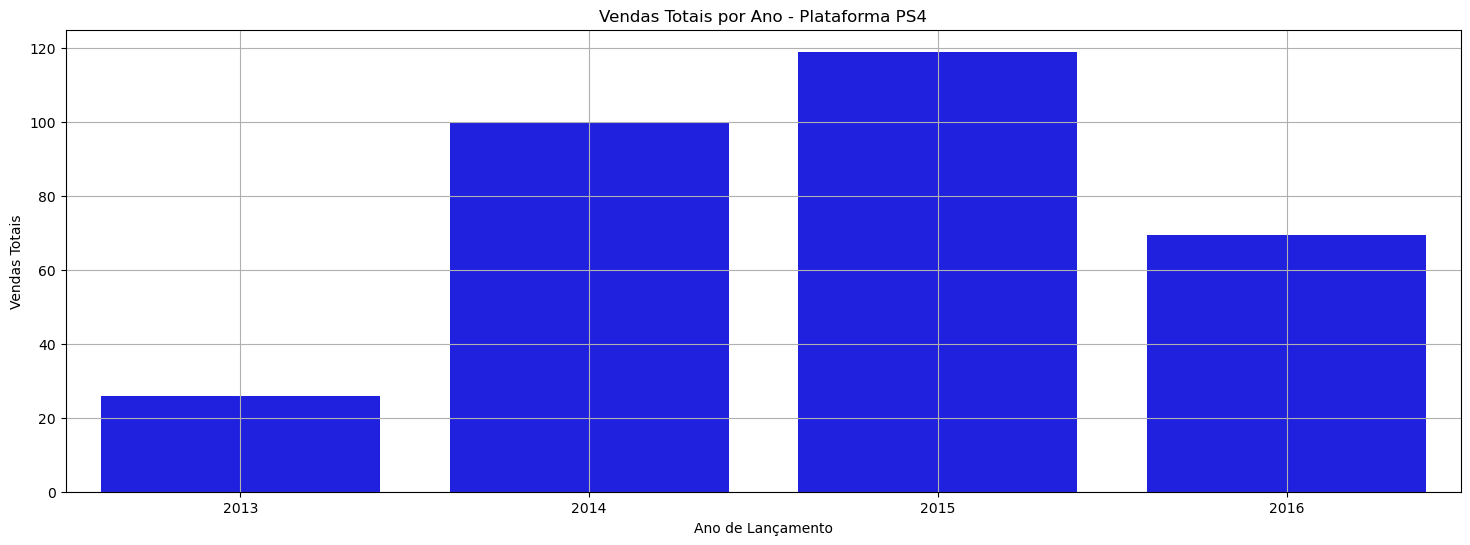

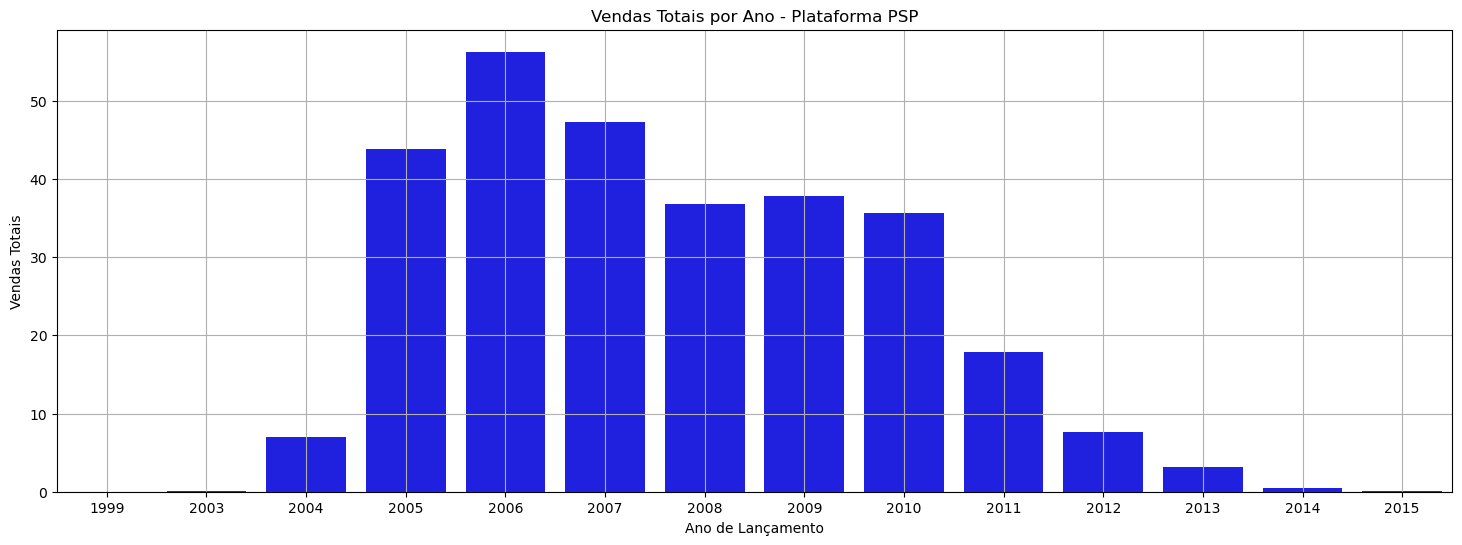

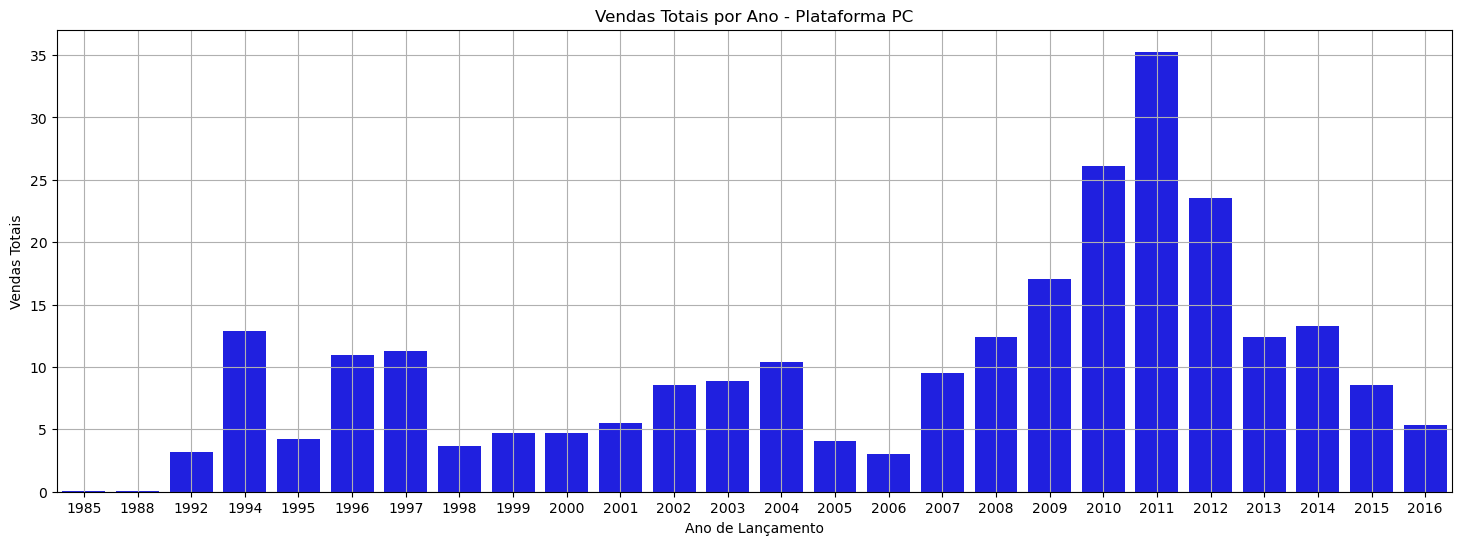

In [39]:
# Vizualizando as plataformas que mais venderam por periodo de tempo em graficos

# Agrupar as vendas totais por plataforma
total_sales_by_platform = df.groupby('Platform')['Total_sales'].sum().reset_index()

# Selecionar as 10 plataformas com as maiores vendas totais
top_10_platforms = total_sales_by_platform.nlargest(10, 'Total_sales')['Platform']

# Filtrar o dataframe para incluir apenas as 10 principais plataformas
filtered_data = df[df['Platform'].isin(top_10_platforms)]

# Iterar sobre as plataformas
for plataforma in top_10_platforms:
    # Filtrar o dataframe para incluir apenas a plataforma atual
    plataforma_data = filtered_data[filtered_data['Platform'] == plataforma]
    
    # Agrupar os dados por ano e calcular as vendas totais
    sales_by_year = plataforma_data.groupby('Year_of_Release')['Total_sales'].sum().reset_index()
    
    # Criar o gráfico de barras com as vendas totais de cada ano
    plt.figure(figsize=(18, 6))
    sns.barplot(x='Year_of_Release', y='Total_sales', data=sales_by_year, color='blue')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Vendas Totais')
    plt.title('Vendas Totais por Ano - Plataforma {}'.format(plataforma))
    plt.grid(True)
    
    plt.show()

6 das 10 plataformas que mais venderam tiveram suas vendas extremamente reduzidas entre 2013 a 2016, sendo elas:

- PS2
- Wii
- DS
- PS
- GBA
- PSP

Além disso, as grandes plataformas custumam ter um ciclo de vendas alto por 6 anos até a sua queda significativa

In [40]:
# Vizualizando as plataformas que mais venderam entre 2010 e 2016
top_10_platforms = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2016)].groupby('Platform')['Total_sales'].sum().nlargest(10).index.tolist()
print(top_10_platforms)

['PS3', 'X360', 'PS4', '3DS', 'Wii', 'XOne', 'DS', 'PC', 'WiiU', 'PSP']


C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


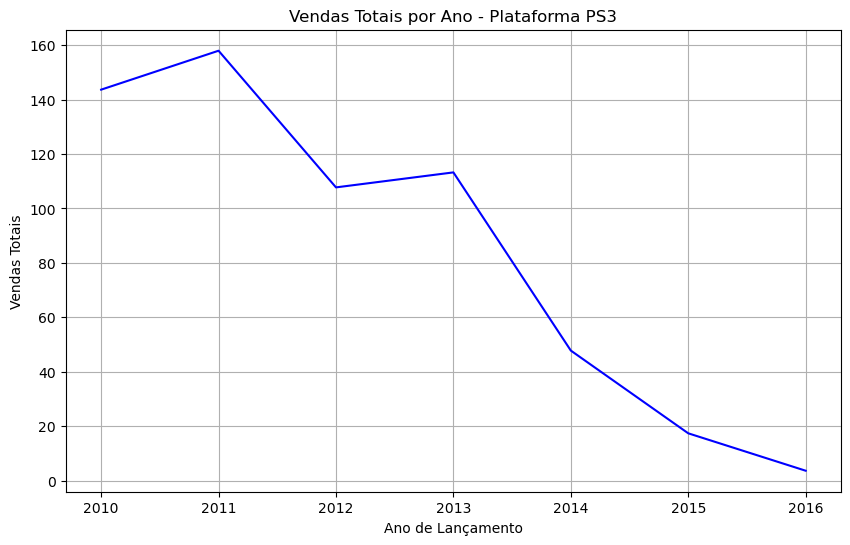

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


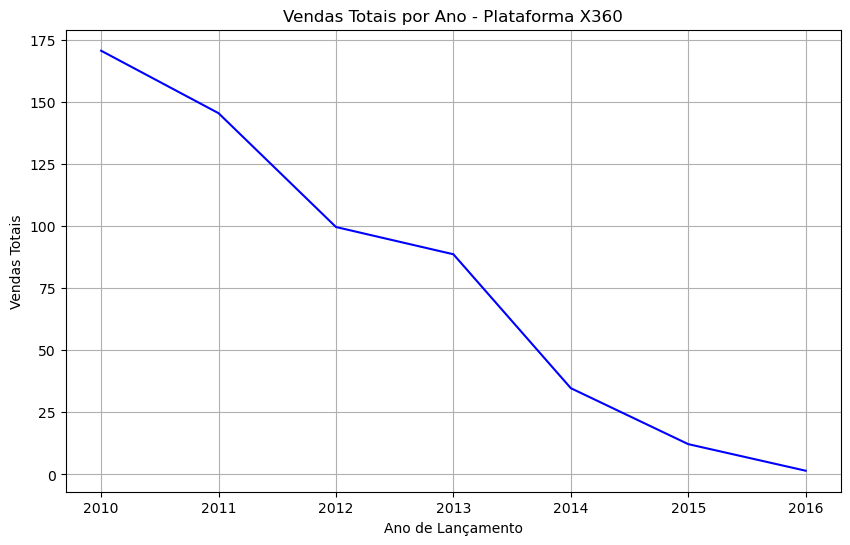

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


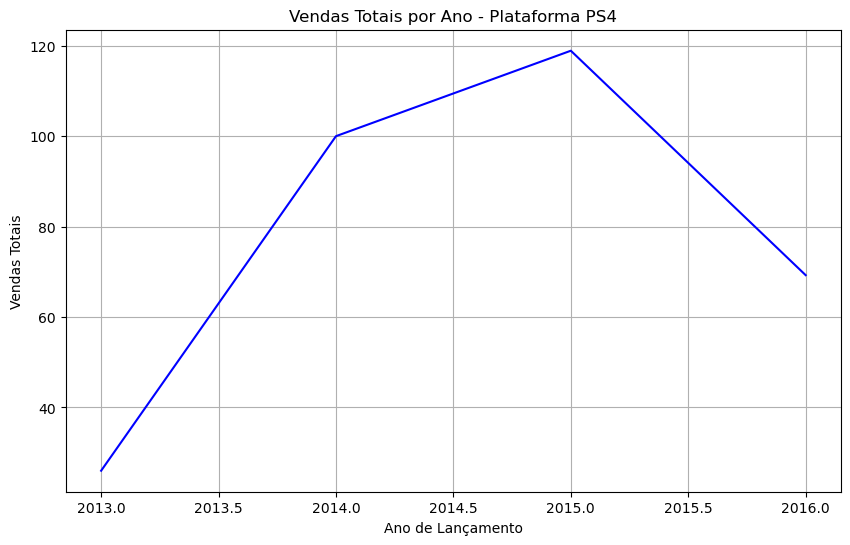

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


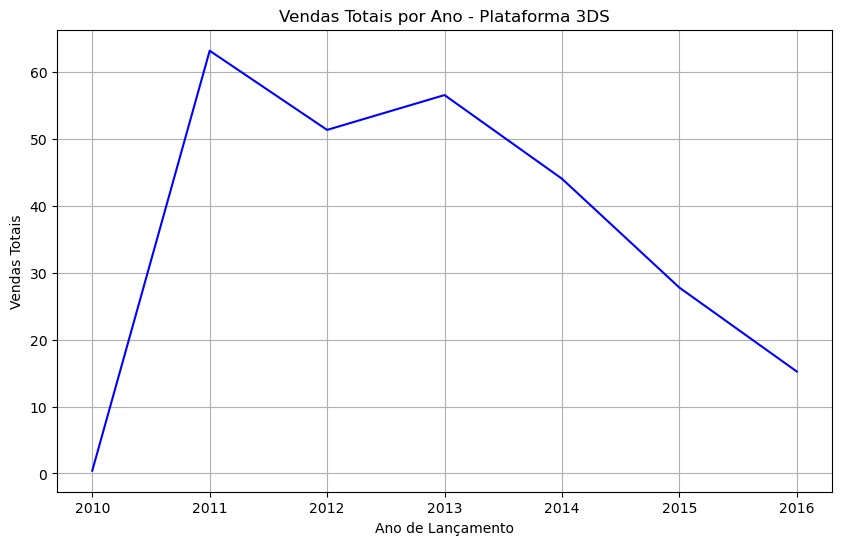

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


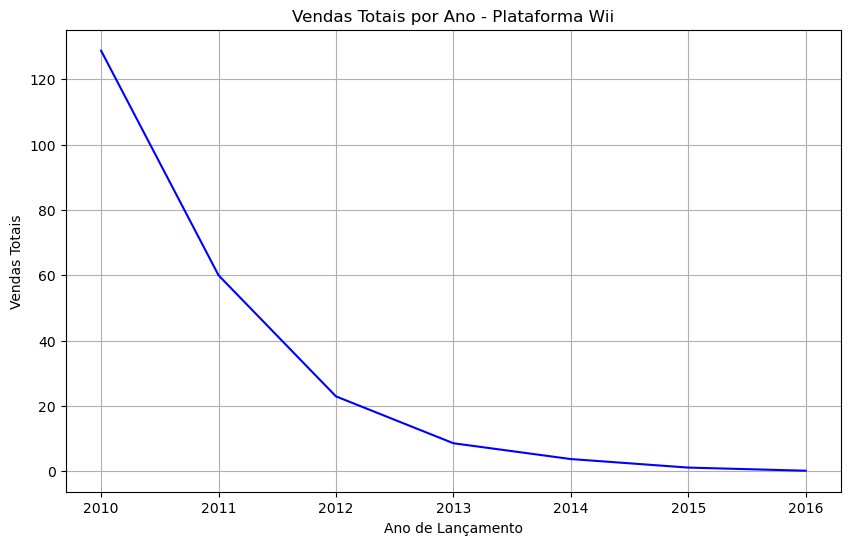

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


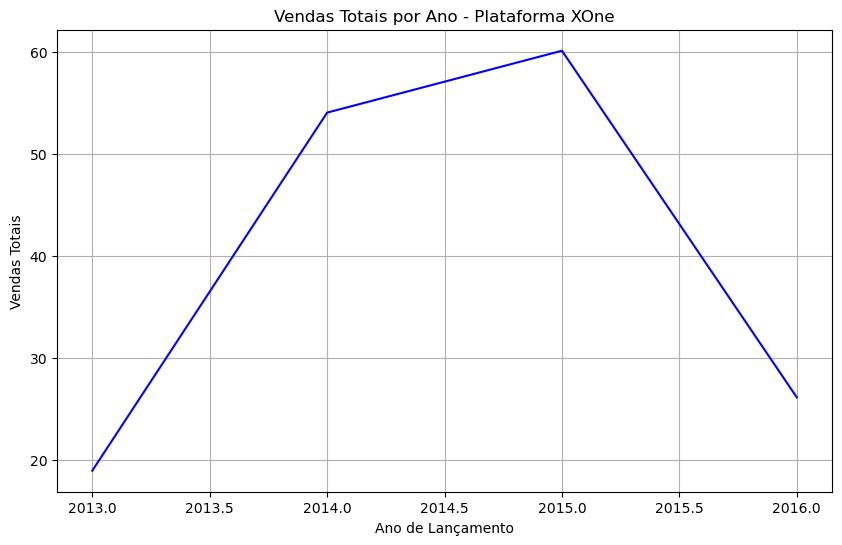

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


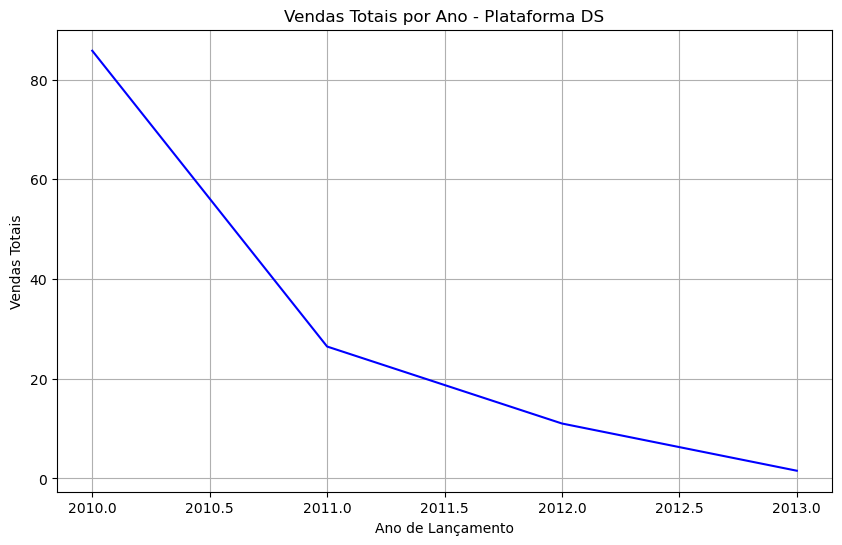

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


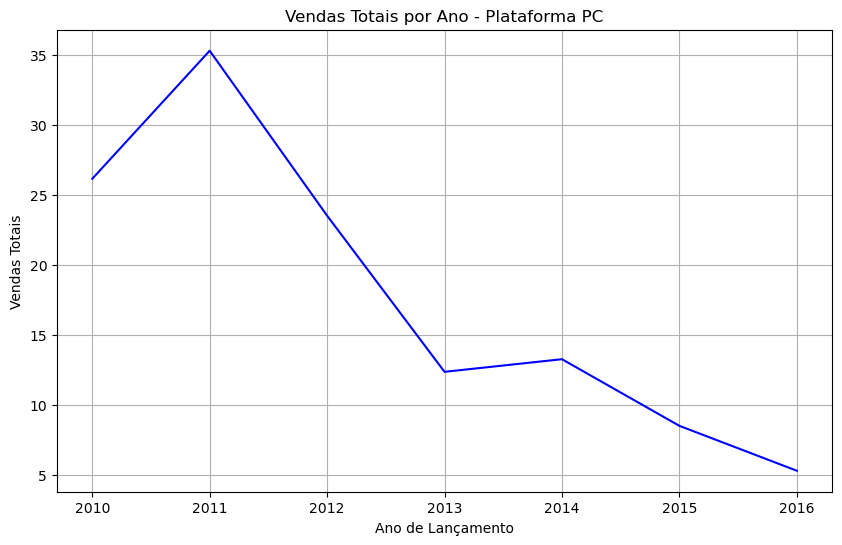

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


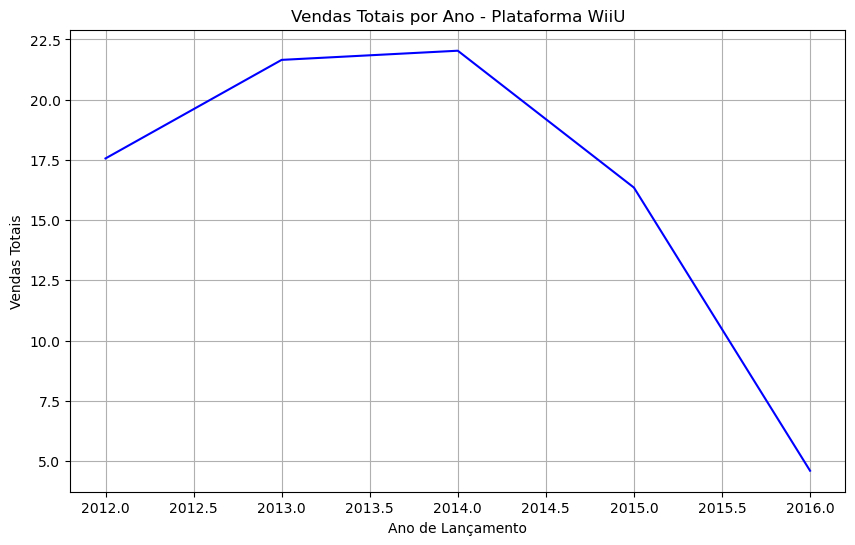

C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DANIEL\anaconda3\envs\DatScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


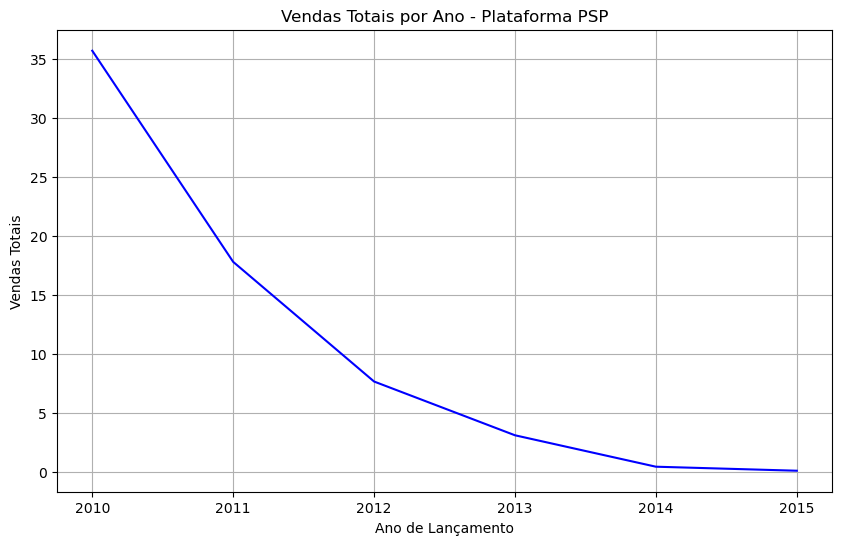

In [41]:
# Vizualizando em graficos as 10 plataformas que mais venderam no periodo de 2010 a 2016

# Filtrar o dataframe para incluir apenas os dados do período de 2010 a 2016 e das 10 principais plataformas
filtered_data = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2016) & (df['Platform'].isin(top_10_platforms))]

# Iterar sobre as plataformas
for plataforma in top_10_platforms:
    # Filtrar o dataframe para incluir apenas a plataforma atual
    plataforma_data = filtered_data[filtered_data['Platform'] == plataforma]
    
    # Agrupar os dados por ano e calcular as vendas totais
    sales_by_year = plataforma_data.groupby('Year_of_Release')['Total_sales'].sum().reset_index()
    
    # Criar o gráfico de linha com as vendas totais de cada ano
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Year_of_Release', y='Total_sales', data=sales_by_year, color='blue')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Vendas Totais')
    plt.title('Vendas Totais por Ano - Plataforma {}'.format(plataforma))
    plt.grid(True)
    
    plt.show()

Nos ultimos anos algumas das empresas que mais venderam tem caido o seu faturamento anual, sendo elas:

- PS3
- 360
- WII
- DS
- WIIU
- PSP

Algumas são promissoras para um possivel investimento, sendo elas:

- PS4
- XONE
- 3DS
- PC

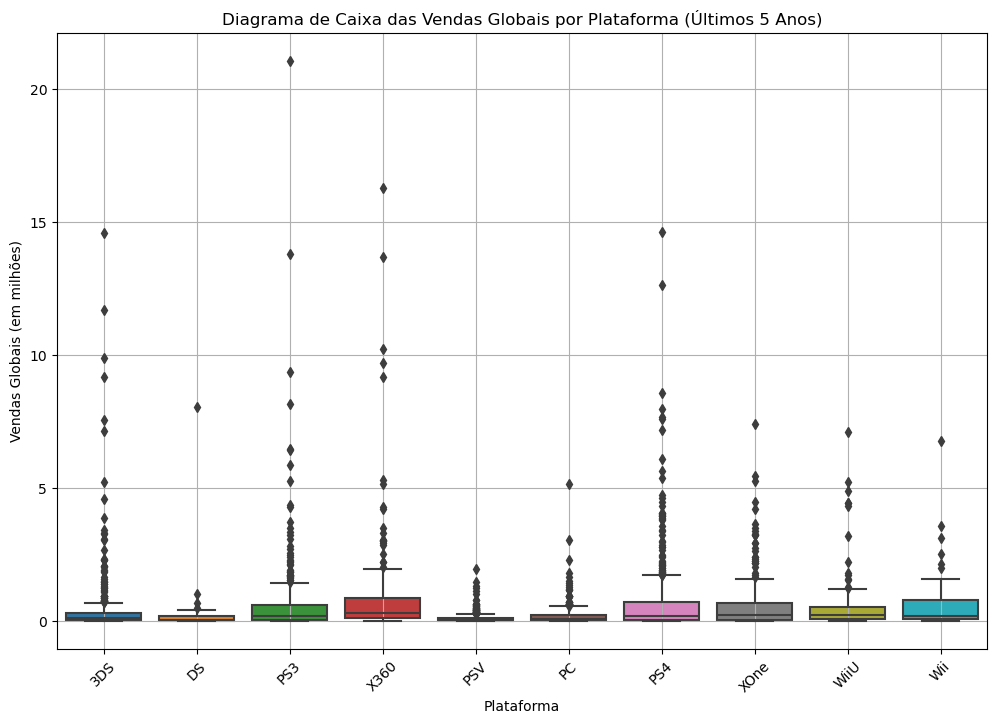

In [42]:
# Vizualização das plataformas que mais venderam nos ultimos 5 anos em graficos de caixa

# Filtrar o dataframe para incluir apenas os últimos 5 anos e as 10 plataformas que mais venderam
filtered_data = df[df['Year_of_Release'] >= 2012]  # Ajuste o valor do ano conforme necessário
top_10_platforms = filtered_data.groupby('Platform')['Total_sales'].sum().nlargest(10).index

filtered_data = filtered_data[filtered_data['Platform'].isin(top_10_platforms)]

# Criar o diagrama de caixa usando o seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Platform', y='Total_sales', data=filtered_data)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.title('Diagrama de Caixa das Vendas Globais por Plataforma (Últimos 5 Anos)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

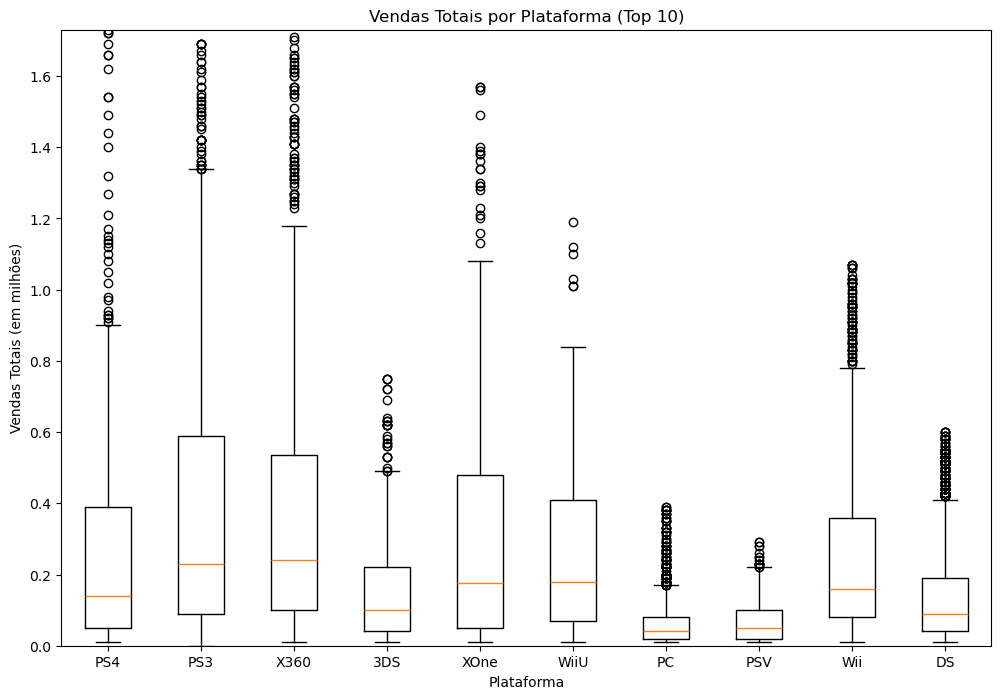

In [43]:
# Filtrar as 10 plataformas que mais venderam nos últimos 5 anos
top_platforms = df[df['Platform'].isin(top_10_platforms)]

# Criar uma função para filtrar os dados removendo os outliers
def remove_outliers(group):
    q1 = group['Total_sales'].quantile(0.25)
    q3 = group['Total_sales'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['Total_sales'] >= lower_bound) & (group['Total_sales'] <= upper_bound)]

# Aplicar a função de filtragem aos dados
filtered_data = top_platforms.groupby('Platform').apply(remove_outliers)

# Definir os limites do eixo Y de acordo com os valores das vendas totais
y_lower = filtered_data['Total_sales'].min()
y_upper = filtered_data['Total_sales'].max()

# Criar o gráfico de caixa com os dados filtrados
plt.figure(figsize=(12, 8))
plt.boxplot([filtered_data[filtered_data['Platform'] == platform]['Total_sales'] for platform in top_10_platforms],
            labels=top_10_platforms)
plt.title('Vendas Totais por Plataforma (Top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.ylim(y_lower, y_upper)  # Definir os limites do eixo Y
plt.show()

As vendas totais e médias entre as plataformas variam bastante. A mediana, apesar de sofrer menos variação em comparação à média, ainda varia entre as 10 plataformas que mais venderam nos últimos 5 anos.

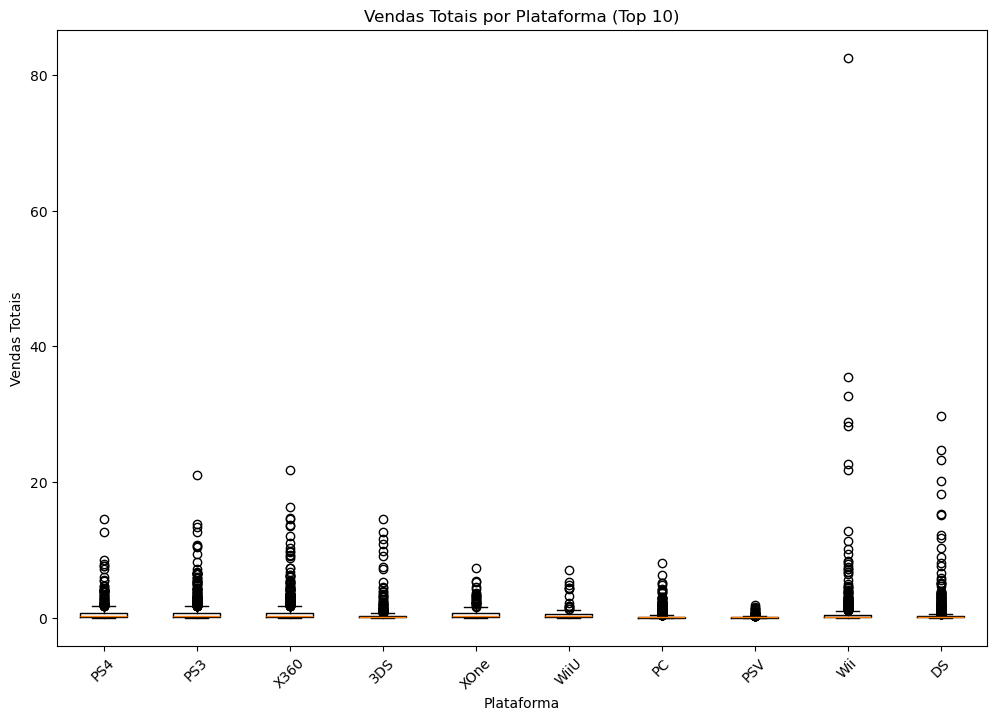

In [44]:
# Filtrar as 10 plataformas que mais venderam nos últimos 5 anos
top_platforms = df[df['Platform'].isin(top_10_platforms)]

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar o gráfico de caixa para cada plataforma
plt.boxplot([top_platforms[top_platforms['Platform'] == platform]['Total_sales'] for platform in top_10_platforms],
            labels=top_10_platforms)

# Configurar os rótulos e títulos do gráfico
plt.title('Vendas Totais por Plataforma (Top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')

# Ajustar o espaçamento entre as etiquetas do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

### Correlações

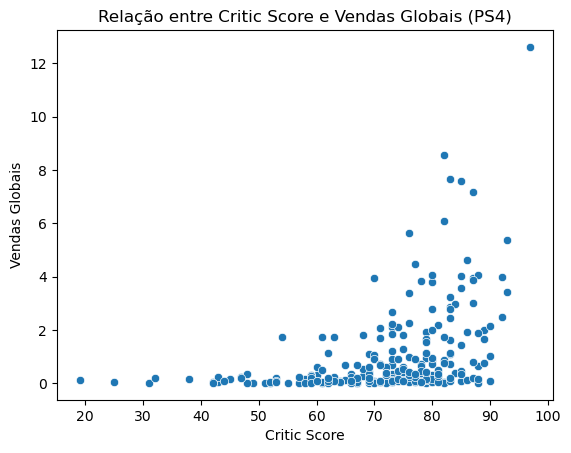

In [45]:


# Filtrar os dados apenas para jogos do PS4 e com valores não nulos no Critic Score
ps4_games = df[(df['Platform'] == 'PS4') & (~df['Critic_Score'].isnull())]

# Criar um gráfico de dispersão para visualizar a relação entre Critic Score e vendas globais
sns.scatterplot(data=ps4_games, x='Critic_Score', y='Total_sales')

# Configurar os rótulos e títulos do gráfico
plt.title('Relação entre Critic Score e Vendas Globais (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Vendas Globais')

# Exibir o gráfico
plt.show()


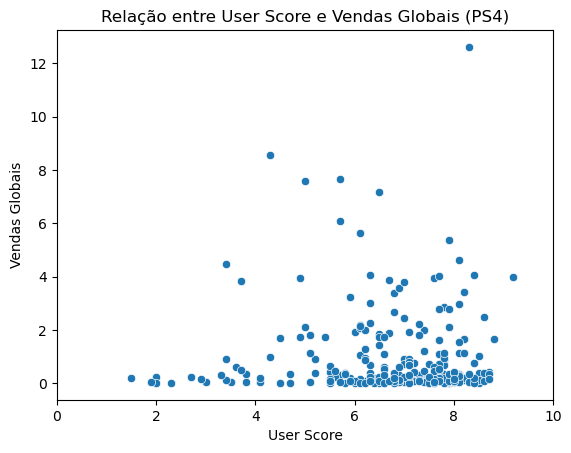

In [46]:
# Definir os limites do eixo X
plt.xlim(0, 10)  # Defina os valores mínimos e máximos desejados para o eixo X


# Filtrar os dados apenas para jogos do PS4 e com valores não nulos no User Score
ps4_games = df[(df['Platform'] == 'PS4') & (~df['User_Score'].isnull())]

# Criar um gráfico de dispersão para visualizar a relação entre User Score e vendas globais
sns.scatterplot(data=ps4_games, x='User_Score', y='Total_sales')

# Configurar os rótulos e títulos do gráfico
plt.title('Relação entre User Score e Vendas Globais (PS4)')
plt.xlabel('User Score')
plt.ylabel('Vendas Globais')

# Exibir o gráfico
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_17300\308938786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4_games['User_Score'] = ps4_games['User_Score'].astype(float)


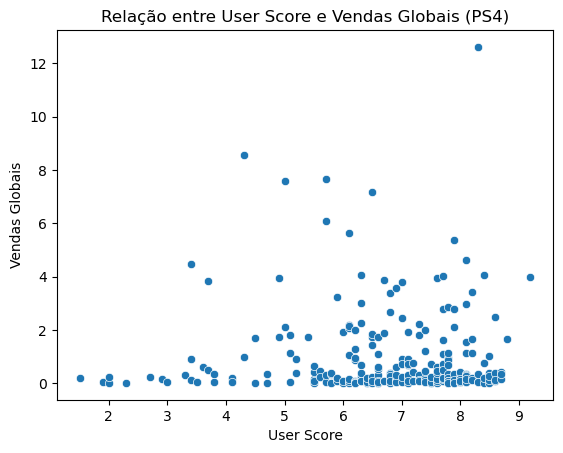

In [47]:
# Filtrar os dados apenas para jogos do PS4 e com valores não nulos e diferentes de "tbd" no User Score
ps4_games = df[(df['Platform'] == 'PS4') & (~df['User_Score'].isnull()) & (df['User_Score'] != 'tbd')]

# Converter a coluna User_Score para o tipo float
ps4_games['User_Score'] = ps4_games['User_Score'].astype(float)

# Ordenar os dados pelo User Score em ordem crescente
ps4_games = ps4_games.sort_values('User_Score')

# Criar um gráfico de dispersão para visualizar a relação entre User Score e vendas globais
sns.scatterplot(data=ps4_games, x='User_Score', y='Total_sales')

# Configurar os rótulos e títulos do gráfico
plt.title('Relação entre User Score e Vendas Globais (PS4)')
plt.xlabel('User Score')
plt.ylabel('Vendas Globais')

# Exibir o gráfico
plt.show()

In [48]:
df['User_Score'].value_counts()

User_Score
7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.6      2
0.2      2
0.7      2
9.7      1
0.0      1
Name: count, Length: 95, dtype: int64

In [49]:
games_filtered = df[~df['Critic_Score'].isnull() & ~df['Total_sales'].isnull()]

# Calcular a correlação entre Critic Score e vendas globais
correlation = games_filtered['Critic_Score'].corr(games_filtered['Total_sales'])

# Imprimir o valor da correlação
print('Correlação entre Critic Score e vendas globais:', correlation)

Correlação entre Critic Score e vendas globais: 0.24550668717736326


In [50]:
# Filtrar os dados apenas para jogos da plataforma 'PS4' com valores não nulos no Critic Score e nas vendas globais
ps4_games = df[(df['Platform'] == 'PS4') & (~df['Critic_Score'].isnull()) & (~df['Total_sales'].isnull())]

# Calcular a correlação entre Critic Score e vendas globais para a plataforma 'PS4'
correlation_ps4 = ps4_games['Critic_Score'].corr(ps4_games['Total_sales'])

# Imprimir o valor da correlação
print('Correlação entre Critic Score e vendas globais para a plataforma PS4:', correlation_ps4)

Correlação entre Critic Score e vendas globais para a plataforma PS4: 0.40656790206178134


In [51]:
# Filtrar os dados para jogos com valores não nulos no User_Score e nas vendas totais
games_with_scores_sales = df[~df['User_Score'].isnull() & ~df['Total_sales'].isnull()]

# Calcular a correlação entre User_Score e vendas totais
correlation_user_score_sales = games_with_scores_sales['User_Score'].astype(float).corr(games_with_scores_sales['Total_sales'])

# Imprimir o valor da correlação
print('Correlação entre User Score e Vendas Totais:', correlation_user_score_sales)

Correlação entre User Score e Vendas Totais: 0.0881791198757914


In [52]:
# Filtrar os dados para jogos do PS4 com valores não nulos no Critic Score e nas vendas globais
ps4_games_with_sales = df[(df['Platform'] == 'PS4') & ~df['User_Score'].isnull() & ~df['Total_sales'].isnull()]

# Calcular a correlação entre Critic Score e vendas globais para o PS4
correlation_ps4 = ps4_games_with_sales['User_Score'].corr(ps4_games_with_sales['Total_sales'])

# Imprimir o valor da correlação para o PS4
print('Correlação entre Critic Score e Vendas Globais (PS4):', correlation_ps4)

Correlação entre Critic Score e Vendas Globais (PS4): -0.03195711020455641


In [53]:
# Filtrar o DataFrame para considerar apenas os dados dos últimos 5 anos (2012-2016)
filtered_data = df[df['Year_of_Release'] >= 2012]

# Agrupar por jogo e calcular as vendas totais
game_sales = filtered_data.groupby('Name')['Total_sales'].sum()

# Obter os 10 jogos que mais venderam
top_10_games = game_sales.nlargest(10)

# Exibir as vendas de cada jogo para cada plataforma
for game in top_10_games.index:
    platform_sales = filtered_data[filtered_data['Name'] == game].groupby('Platform')['Total_sales'].sum()
    platform_sales = platform_sales.sort_values(ascending=False)  # Ordenar as plataformas em ordem decrescente
    print(f"Jogo: {game}")
    print(platform_sales)
    print()

Jogo: Grand Theft Auto V
Platform
PS3     21.05
X360    16.27
PS4     12.62
XOne     5.47
PC       1.17
Name: Total_sales, dtype: float64

Jogo: Call of Duty: Black Ops II
Platform
PS3     13.79
X360    13.68
PC       1.52
WiiU     0.41
Name: Total_sales, dtype: float64

Jogo: Call of Duty: Ghosts
Platform
X360    10.24
PS3      9.36
PS4      3.83
XOne     2.92
PC       0.69
WiiU     0.35
Name: Total_sales, dtype: float64

Jogo: Call of Duty: Black Ops 3
Platform
PS4     14.63
XOne     7.39
X360     1.70
PS3      1.69
PC       0.26
Name: Total_sales, dtype: float64

Jogo: Minecraft
Platform
X360    9.18
PS3     5.27
PS4     4.32
XOne    2.76
PSV     1.96
WiiU    0.67
Name: Total_sales, dtype: float64

Jogo: Call of Duty: Advanced Warfare
Platform
PS4     7.66
XOne    5.26
PS3     4.36
X360    4.28
PC      0.41
Name: Total_sales, dtype: float64

Jogo: FIFA 15
Platform
PS4     6.08
PS3     4.28
X360    2.92
XOne    2.18
PSV     0.60
Wii     0.56
3DS     0.46
PC      0.29
Name: Total_sale

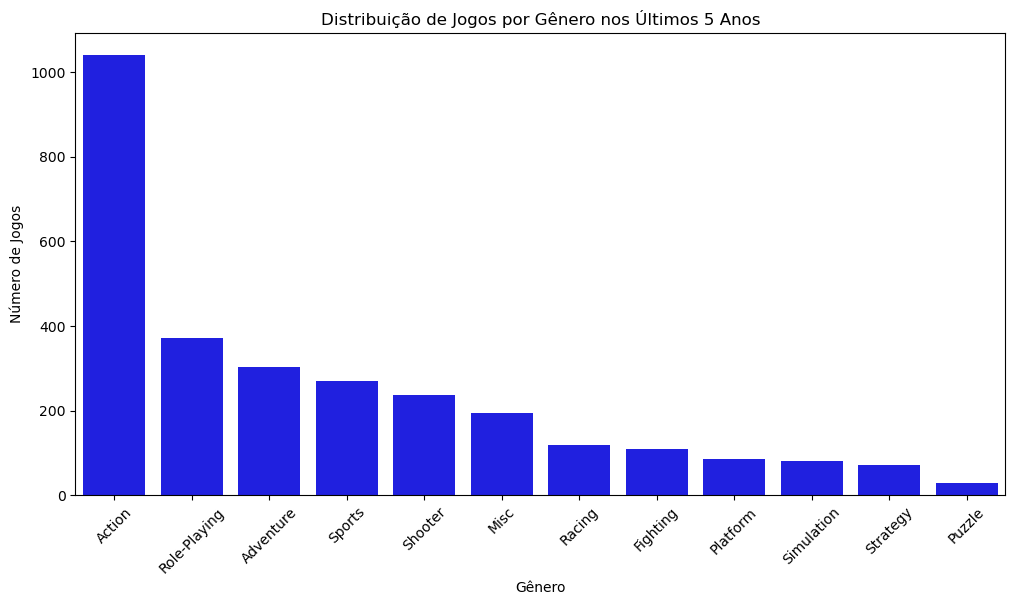

In [54]:
# Filtrar os dados para incluir apenas os jogos dos últimos 5 anos
recent_data = df[df['Year_of_Release'] >= 2012]

# Agrupar por gênero e contar o número de jogos em cada gênero
genre_counts = recent_data['Genre'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='blue')

# Configurar os rótulos e títulos do gráfico
plt.xlabel('Gênero')
plt.ylabel('Número de Jogos')
plt.title('Distribuição de Jogos por Gênero nos Últimos 5 Anos')

# Girar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

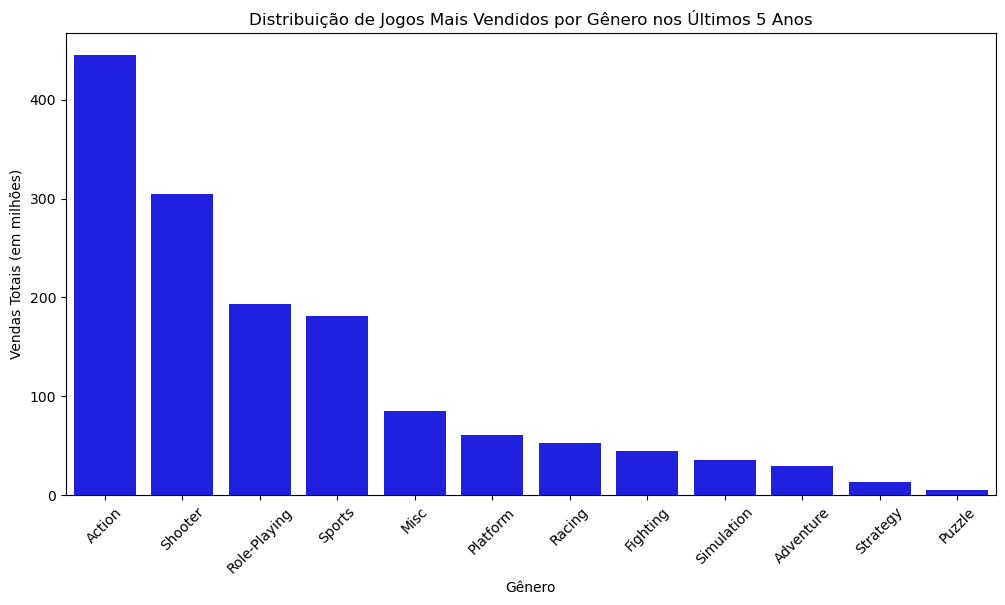

In [55]:
# Filtrar os dados para incluir apenas os jogos dos últimos 5 anos
recent_data = df[df['Year_of_Release'] >= 2012]

# Agrupar por gênero e calcular as vendas totais por gênero
genre_sales = recent_data.groupby('Genre')['Total_sales'].sum().sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, color='blue')

# Configurar os rótulos e títulos do gráfico
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.title('Distribuição de Jogos Mais Vendidos por Gênero nos Últimos 5 Anos')

# Girar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

Nessa análise, observa-se uma correlação linear positiva entre a avaliação da crítica sobre os jogos e a quantidade de vendas que eles realizam, sendo ainda mais significativa para a plataforma PS4. Além disso, constata-se que a correlação entre a nota atribuída pelos usuários aos jogos é muito fraca, o que, na minha opinião, indica que há uma ênfase maior na avaliação da crítica em vez da avaliação dos usuários.

## Perfil de usuarios

In [56]:
# Filtrar o DataFrame original para incluir apenas as colunas relevantes
df_filtered = df[['Platform', 'NA_sales', 'EU_sales', 'JP_sales']]

# Calcular as vendas totais de cada plataforma em cada região
platform_sales = df_filtered.groupby('Platform').sum()

# Ordenar as plataformas com base nas vendas totais em cada região
platform_sales_sorted = platform_sales.sort_values(by=['NA_sales', 'EU_sales', 'JP_sales'], ascending=False)

# Selecionar as cinco plataformas principais em cada região em ordem decrescente
top_platforms = platform_sales_sorted.head(5).sort_values(by=['NA_sales', 'EU_sales', 'JP_sales'], ascending=False)

# Descrever as variações das quotas de mercado de região para região
for column in ['NA_sales', 'EU_sales', 'JP_sales']:
    region = column[:2].upper()
    print(f"Região: {region}")
    for platform, sales in top_platforms.iterrows():
        total_sales = sales[column]
        formatted_sales = "{:.2f}".format(total_sales)
        print(f"Plataforma: {platform}, Vendas Totais: {formatted_sales}")
    print()

Região: NA
Plataforma: X360, Vendas Totais: 602.47
Plataforma: PS2, Vendas Totais: 583.84
Plataforma: Wii, Vendas Totais: 496.90
Plataforma: PS3, Vendas Totais: 393.49
Plataforma: DS, Vendas Totais: 382.40

Região: EU
Plataforma: X360, Vendas Totais: 270.76
Plataforma: PS2, Vendas Totais: 339.29
Plataforma: Wii, Vendas Totais: 262.21
Plataforma: PS3, Vendas Totais: 330.29
Plataforma: DS, Vendas Totais: 188.89

Região: JP
Plataforma: X360, Vendas Totais: 12.43
Plataforma: PS2, Vendas Totais: 139.20
Plataforma: Wii, Vendas Totais: 69.33
Plataforma: PS3, Vendas Totais: 80.19
Plataforma: DS, Vendas Totais: 175.57



In [57]:
# Filtrar o DataFrame original para incluir apenas as colunas relevantes
df_filtered = df[['Genre', 'NA_sales', 'EU_sales', 'JP_sales']]

# Calcular as vendas totais de cada gênero em cada região
genre_sales = df_filtered.groupby('Genre').sum()

# Ordenar os gêneros com base nas vendas totais em cada região
genre_sales_sorted = genre_sales.sort_values(by=['NA_sales', 'EU_sales', 'JP_sales'], ascending=False)

# Selecionar os cinco principais gêneros em cada região
top_genres = genre_sales_sorted.head(5)

# Explique a diferença entre os cinco principais gêneros
for column in ['NA_sales', 'EU_sales', 'JP_sales']:
    region = column[:2].upper()
    print(f"Região: {region}")
    for genre, sales in top_genres.iterrows():
        total_sales = sales[column]
        formatted_sales = "{:.2f}".format(total_sales)
        print(f"Gênero: {genre}, Vendas Totais: {formatted_sales}")
    print()

Região: NA
Gênero: Action, Vendas Totais: 879.01
Gênero: Sports, Vendas Totais: 684.43
Gênero: Shooter, Vendas Totais: 592.24
Gênero: Platform, Vendas Totais: 445.50
Gênero: Misc, Vendas Totais: 407.27

Região: EU
Gênero: Action, Vendas Totais: 519.13
Gênero: Sports, Vendas Totais: 376.79
Gênero: Shooter, Vendas Totais: 317.34
Gênero: Platform, Vendas Totais: 200.35
Gênero: Misc, Vendas Totais: 212.74

Região: JP
Gênero: Action, Vendas Totais: 161.43
Gênero: Sports, Vendas Totais: 135.54
Gênero: Shooter, Vendas Totais: 38.76
Gênero: Platform, Vendas Totais: 130.83
Gênero: Misc, Vendas Totais: 108.11



In [58]:
# Filtrar os dados para os últimos 5 anos (2012 a 2016)
last_5_years = df[df['Year_of_Release'] >= 2012]

# Calcular as vendas totais para cada classificação
rating_sales = last_5_years.groupby('Rating')['Total_sales'].sum()

# Ordenar as vendas totais em ordem decrescente
rating_sales_sorted = rating_sales.sort_values(ascending=False)

# Exibir as classificações com as vendas mais altas
print("Classificações com as vendas mais altas nos últimos 5 anos:")
print(rating_sales_sorted)

Classificações com as vendas mais altas nos últimos 5 anos:
Rating
M       511.19
E       287.80
T       162.29
E10+    157.96
RP        0.01
Name: Total_sales, dtype: float64


A classificação M foi a que mais vendeu nos ultimos 5 anos, mas não acho que seria correto afirmar que a classificação afetará a quantidade arrecadada na venda do jogo.

## Teste de hipoteses

In [59]:
import scipy.stats as stats

# Filtrar o DataFrame original para incluir apenas as plataformas Xbox One e PC
xbox_one_scores = df[df['Platform'] == 'XOne']['User_Score']
pc_scores = df[df['Platform'] == 'PC']['User_Score']

# Remover valores nulos
xbox_one_scores = xbox_one_scores.dropna()
pc_scores = pc_scores.dropna()

# Realizar o teste t para duas amostras independentes
t_statistic, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)

# Definir o nível de significância
alpha = 0.05

# Verificar se o valor-p é menor que o nível de significância
if p_value < alpha:
    print("Rejeitar a hipótese nula - As classificações médias dos usuários das plataformas Xbox One e PC são estatisticamente diferentes.")
else:
    print("Aceitar a hipótese nula - Não há evidências suficientes para concluir que as classificações médias dos usuários das plataformas Xbox One e PC são diferentes.")

Rejeitar a hipótese nula - As classificações médias dos usuários das plataformas Xbox One e PC são estatisticamente diferentes.


In [60]:

# Filtrar o DataFrame original para incluir apenas os gêneros Action e Sports
action_scores = df[df['Genre'] == 'Action']['User_Score']
sports_scores = df[df['Genre'] == 'Sports']['User_Score']

# Remover valores nulos
action_scores = action_scores.dropna()
sports_scores = sports_scores.dropna()

# Realizar o teste t para duas amostras independentes
t_statistic, p_value = stats.ttest_ind(action_scores, sports_scores)

# Definir o nível de significância
alpha = 0.05

# Verificar se o valor-p é menor que o nível de significância
if p_value < alpha:
    print("Rejeitar a hipótese nula - As classificações médias de usuários para os gêneros Action e Sports são estatisticamente diferentes.")
else:
    print("Aceitar a hipótese nula - Não há evidências suficientes para concluir que as classificações médias de usuários para os gêneros Action e Sports são diferentes.")

Aceitar a hipótese nula - Não há evidências suficientes para concluir que as classificações médias de usuários para os gêneros Action e Sports são diferentes.


### Explicação
Quando estamos testando hipóteses, temos uma hipótese nula, que é a ideia de que não há diferença entre os grupos que estamos comparando, e uma hipótese alternativa, que sugere que há uma diferença.

No caso da comparação das classificações médias de usuários para os gêneros Action e Sports, a hipótese nula seria que as médias são iguais, ou seja, não há diferença significativa entre os dois gêneros. A hipótese alternativa seria que as médias são diferentes, indicando que os gêneros têm médias de classificação diferentes entre os usuários.

Para testar essa hipótese, usamos uma medida chamada valor-p. O valor-p nos diz a probabilidade de obter um resultado tão extremo quanto o observado, considerando que a hipótese nula seja verdadeira. Se o valor-p for menor que um determinado limite, geralmente 0,05, consideramos que há evidências suficientes para rejeitar a hipótese nula e concluir que há uma diferença significativa entre as médias.

No nosso teste, utilizamos um teste estatístico chamado teste t para duas amostras independentes. Ele nos fornece o valor-p necessário para avaliar a diferença entre as médias de classificação dos gêneros Action e Sports. Comparando o valor-p com o limite estabelecido, podemos tomar uma decisão sobre as hipóteses.

Em resumo, o teste de hipótese nos ajuda a avaliar se há uma diferença estatisticamente significativa entre as classificações médias de usuários nos gêneros Action e Sports. Usamos o valor-p para tomar essa decisão, comparando-o com um limite pré-determinado.

## Conclusões 

As plataformas que mais venderam no total foram:

- PS2: 1255.77
- X360: 971.42
- PS3: 939.65
- Wii: 907.51
- DS: 806.12
- PS: 730.86
- GBA: 317.85
- PS4: 314.14
- PSP: 294.05
- PC: 259.52

Os gêneros que mais venderam no total foram:

- Action: 1744.17
- Sports: 1331.27
- Shooter: 1052.45
- Role-Playing: 934.56
- Platform: 827.77
- Misc: 802.51
- Racing: 728.67
- Fighting: 447.53
- Simulation: 389.97
- Puzzle: 242.57
- Adventure: 237.59
- Strategy: 174.23

6 das 10 plataformas que mais venderam tiveram suas vendas extremamente reduzidas entre 2013 e 2016, sendo elas:

- PS2
- Wii
- DS
- PS
- GBA
- PSP

Além disso, as grandes plataformas costumam ter um ciclo de vendas alto por aproximadamente 6 anos até a sua queda significativa.

Nos últimos anos, algumas das empresas que mais venderam têm tido queda em seu faturamento anual, sendo elas:

- PS3
- Xbox 360
- Wii
- DS
- Wii U
- PSP

Algumas plataformas são promissoras para um possível investimento, sendo elas:

- PS4
- Xbox One
- 3DS
- PC

As 10 plataformas que mais venderam entre 2010 e 2016 têm médias, medianas e vendas totais bastante distintas entre elas.

Existe uma correlação linear positiva entre a critica profissional do jogo com suas vendas totais

Os generos parecem afetar diretamente o quanto o jogo vende.

